In [3]:
import matplotlib
import pandas as pd
import networkx as nx


In [4]:
df = pd.read_csv("MiddleSchoolELAScoresByPassedGrade7_2019.csv")
df.head()

,Unnamed: 0,DBN,Category,Tested,Passed,Unnamed: 5,Category.1,Tested.1,Passed.1,Unnamed: 9,%Disadvantaged,%NotDisadvantaged,%PASSED,DisadvantagedDecile,PassedDecile,Passed.2
0,1,01M034,Econ Disadv,36,0,NaN,Not Econ Disadv,1,0,NaN,0.97,0.03,0.00,10,0,0
1,2,01M140,Econ Disadv,48,29,NaN,Not Econ Disadv,12,42,NaN,0.80,0.20,0.32,8,3,32
2,3,01M184,Econ Disadv,62,71,NaN,Not Econ Disadv,19,100,NaN,0.77,0.23,0.78,8,8,78
3,4,01M188,Econ Disadv,47,0,NaN,Not Econ Disadv,3,0,NaN,0.94,0.06,0.00,9,0,0
4,5,01M332,Econ Disadv,58,14,NaN,Not Econ Disadv,10,50,NaN,0.85,0.15,0.19,9,2,19


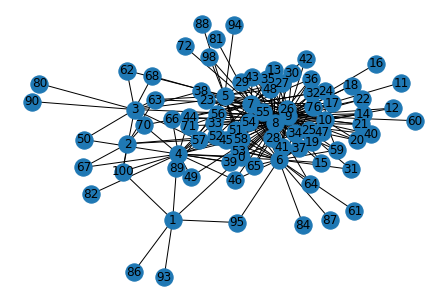

In [9]:
g = nx.from_pandas_edgelist(df, 'Passed','DisadvantagedDecile')
# Plot it
nx.draw(g, with_labels=True)

In [19]:
# Make a list of the the level of disadvantage by economic decile per school, we'll use it later
dsvgdcl = list(df.DisadvantagedDecile.unique())
dsvgdcl

[10, 8, 9, 6, 1, 7, 5, 3, 4, 2]

In [20]:
# Make a list of the Percentage students per school that passed the ELA exam, we'll use it later
pctpsd = list(df.Passed.unique())
pctpsd

[0,
 29,
 71,
 14,
 32,
 64,
 100,
 51,
 56,
 95,
 76,
 40,
 70,
 50,
 25,
 93,
 89,
 57,
 38,
 90,
 46,
 63,
 20,
 17,
 68,
 42,
 10,
 36,
 86,
 94,
 27,
 24,
 23,
 65,
 48,
 35,
 6,
 21,
 88,
 13,
 43,
 55,
 41,
 58,
 30,
 22,
 3,
 39,
 18,
 19,
 8,
 60,
 12,
 52,
 26,
 59,
 28,
 15,
 37,
 31,
 45,
 34,
 53,
 11,
 16,
 33,
 44,
 80,
 62,
 49,
 72,
 84,
 47,
 82,
 54,
 61,
 66,
 67,
 7,
 87,
 81,
 4,
 98]

In [21]:
dict(zip(dsvgdcl, dsvgdcl))

{10: 10, 8: 8, 9: 9, 6: 6, 1: 1, 7: 7, 5: 5, 3: 3, 4: 4, 2: 2}

In [22]:
g.degree(7)

39

In [24]:
[DisadvantagedDecile for DisadvantagedDecile in dsvgdcl]

[10, 8, 9, 6, 1, 7, 5, 3, 4, 2]

In [25]:
[g.degree(DisadvantagedDecile) for DisadvantagedDecile in dsvgdcl]

[14, 49, 51, 26, 6, 39, 19, 12, 20, 6]

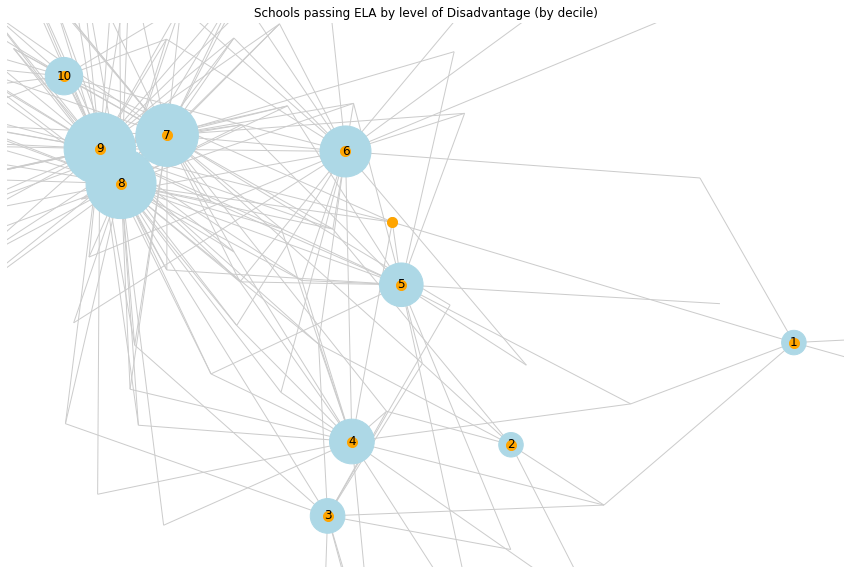

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, 'Passed','DisadvantagedDecile')

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# Passed small and grey
# DisadvantagedDecile sized according to their number of connections
# DisadvantagedDecile blue
# Labels for dd ONLY
# Passed that are highly connected are a highlighted color

# Go through every DisadvantagedDecile, ask the graph how many
# connections it has. Multiply that by 100 to get the circle size
dd_size = [g.degree(DisadvantagedDecile) * 100 for DisadvantagedDecile in dd]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=dd, 
                       node_size=dd_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw every PassedDecile
nx.draw_networkx_nodes(g, layout, nodelist=pd, node_color='#cccccc', node_size=100)

# Draw schools with high Centrality
centrallized_passed = [passed for passed in pd if g.degree(passed) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=centrallized_passed, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(dd, dd))
nx.draw_networkx_labels(g, layout, labels=node_labels)
#nx.draw_networkx_edge_labels(g,pos=nx.spring_layout(g))

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Schools passing ELA by level of Disadvantage (by decile)")

# 5. Tell matplotlib to show it
plt.show()